In [1]:
!pip install scikit-llm
!pip install transformers
from transformers import AutoTokenizer, DistilBertModel
!pip install tensorflow-text
!pip install -q ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 40.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires tiktoken, which is not installed.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 32.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 55.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 52.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.4 MB/s eta 0:00:00
  Preparing metadata (setup.

In [2]:
# from google.colab import files
# uploded = files.upload()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [85]:
import re
import nltk
import keras
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
import pandas as pd
import numpy as np
import sys
import warnings
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from nltk.tokenize import word_tokenize
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from transformers import BertModel
from skllm import ZeroShotGPTClassifier
from sklearn.preprocessing import LabelEncoder
import ktrain
from ktrain import text
import tensorflow as tf
import time
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
import torch
le = LabelEncoder()

In [68]:

# Load up the training dataset
data = pd.read_csv("/content/drive/MyDrive/Survey Data_shipping.csv")
#data.columns
#data['category'].value_counts()
data['category'] = data['category'].replace({'Operational ':'Operational','others': 'Others'})

# Clean up training comments & Steming
def preprocessed_text(text):
        text = text.lower() # Convert text to lowercase
        text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text)   # Remove special characters and digits
        tokens = nltk.word_tokenize(text)    # Tokenization
        stop_words = set(stopwords.words("english"))  # Remove stopwords
        stop_words.add("UPS")
        stop_words.add("UP S")
        tokens = [token for token in tokens if token not in stop_words]
        stemmer = PorterStemmer()   # Stemming
        tokens = [stemmer.stem(token) for token in tokens]
        preprocessed_text = " ".join(tokens)  # Join tokens back into a single string
        return preprocessed_text
data["preprocessed_text"] = data["comment"].apply(preprocessed_text) # Preprocess the text column

In [69]:
data

,comment,category,preprocessed_text
0,Easy,Layout/Navigation/Usablity,easi
1,Easy,Layout/Navigation/Usablity,easi
2,easy,Layout/Navigation/Usablity,easi
3,easy,Layout/Navigation/Usablity,easi
4,Simple,Layout/Navigation/Usablity,simpl
...,...,...,...
5977,bl,Others,bl
5978,bl,Others,bl
5979,bl,Others,bl
5980,bl,Others,bl


In [70]:
def find_length(a):
  return len(a.split())


In [71]:
lengths = data['preprocessed_text'].apply(find_length)

In [72]:
lengths = list(lengths)

In [73]:
np.max(lengths)

214

In [74]:
# This is for 18 catagories #data['Category'] = data['Category'].replace({'Claims ':'Claims','claims':'Claims', 'account/Settings/Preferences':'Account/Settings/Preferences', 'Documentation/forms':'Documentation/Forms', 'other':'Other'})

In [75]:
# Split the data into features (X) and labels (y)
X = data["preprocessed_text"]
y = data["category"]
y_labelled = le.fit_transform(data['category'])

In [76]:
y_labelled

array([0, 0, 0, ..., 2, 2, 2])

In [77]:
le.inverse_transform([2])

array(['Others'], dtype=object)

In [78]:
data['category_encoded'] = y_labelled

In [14]:
# text

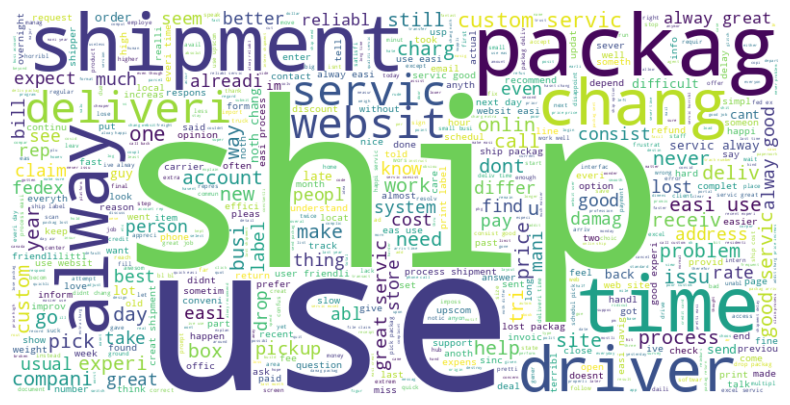

In [82]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming X is a list of preprocessed text
text = ' '.join(X)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words= 800).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [16]:
# from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y_labelled, test_size=0.2, stratify=y, random_state=42)

In [86]:
(x_train,  y_train), (x_test, y_test), preproc = text.texts_from_array(x_train=list(X_train),
                                                                       y_train=y_train,
                                                                       x_test=list(X_test),
                                                                       y_test=y_test,
                                                                       class_names=['0', '1','2','3','4','5'],
                                                                       preprocess_mode='bert',
                                                                       ngram_range=1,
                                                                       maxlen=180)

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


In [87]:
# import keras
# from keras.layers import *
# from keras.models import Sequential

# input_shape = (20, 20, 1)
# batch_size = 128
# num_classes = 12
# epochs = 5
# model = Sequential()
# model.add(Conv2D(32, kernel_size=(3, 3),
#                  activation='relu',
#                  input_shape=input_shape))
# model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(6, activation='softmax'))
# model.compile(loss=keras.losses.categorical_crossentropy,
#               optimizer=keras.optimizers.Adam(),
#               metrics=['accuracy'])

In [30]:
# lr_finder = LRFinder(model)
# lr_finder.find(snk_X.reshape((200000, 20, 20, 1)),
#                keras.utils.np_utils.to_categorical(snk_y)[:, 1:],
#                start_lr=10e-5, end_lr=1, batch_size=500, epochs=1)
# lr_finder.plot_loss(n_skip_beginning=20, n_skip_end=5)

In [26]:
# ktrain.release_gpu_memory()
keras.backend.clear_session()

In [88]:
model = text.text_classifier('bert',
                             train_data=(x_train, y_train),
                             preproc=preproc)


Is Multi-Label? False
maxlen is 180


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


In [90]:

learner2 = ktrain.get_learner(model,
                             train_data=(x_train, y_train),
                             batch_size=8)


simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/10
599/599 [==============================] - 228s 328ms/step - loss: 1.8021 - accuracy: 0.2418
Epoch 2/10
599/599 [==============================] - 199s 332ms/step - loss: 1.3228 - accuracy: 0.5120
Epoch 3/10
599/599 [==============================] - 199s 331ms/step - loss: 0.8598 - accuracy: 0.6924
Epoch 4/10
599/599 [==============================] - 198s 331ms/step - loss: 0.7660 - accuracy: 0.7172
Epoch 5/10
599/599 [==============================] - 198s 331ms/step - loss: 1.3580 - accuracy: 0.4591
Epoch 6/10
599/599 [==============================] - 198s 331ms/step - loss: 1.5978 - accuracy: 0.3434
Epoch 7/10
599/599 [==============================] - 175s 293ms/step - loss: 4.4866 - accuracy: 0.3262


done.
Visually inspect loss plot and select learning rate associated with falling loss


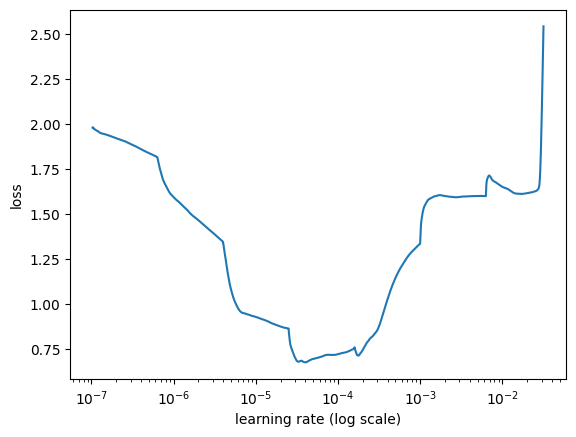

In [24]:
learner2.lr_find(start_lr=1e-07, lr_mult=1.01, max_epochs= 10, show_plot= True,)

In [91]:
model.summary()


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 Input-Token (InputLayer)    [(None, 180)]                0         []                            
                                                                                                  
 Input-Segment (InputLayer)  [(None, 180)]                0         []                            
                                                                                                  
 Embedding-Token (TokenEmbe  [(None, 180, 768),           2344089   ['Input-Token[0][0]']         
 dding)                       (30522, 768)]               6                                       
                                                                                                  
 Embedding-Segment (Embeddi  (None, 180, 768)             1536      ['Input-Segment[0][0]'] 

In [92]:
hist = learner2.fit_onecycle(1e-4, 10)



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/10
599/599 [==============================] - 224s 333ms/step - loss: 0.8643 - accuracy: 0.6853
Epoch 2/10
599/599 [==============================] - 199s 332ms/step - loss: 0.5812 - accuracy: 0.7873
Epoch 3/10
599/599 [==============================] - 199s 332ms/step - loss: 0.4821 - accuracy: 0.8242
Epoch 4/10
599/599 [==============================] - 199s 332ms/step - loss: 0.4420 - accuracy: 0.8391
Epoch 5/10
599/599 [==============================] - 199s 332ms/step - loss: 0.4264 - accuracy: 0.8541
Epoch 6/10
599/599 [==============================] - 199s 332ms/step - loss: 0.3815 - accuracy: 0.8646
Epoch 7/10
599/599 [==============================] - 199s 332ms/step - loss: 0.2676 - accuracy: 0.9001
Epoch 8/10
599/599 [==============================] - 199s 332ms/step - loss: 0.1608 - accuracy: 0.9346
Epoch 9/10
599/599 [==============================] - 199s 332ms/step - loss: 0.0995 - accuracy: 0.9582


In [94]:
learner2.validate(val_data=(x_test, y_test))

38/38 [==============================] - 15s 403ms/step
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       395
           1       0.80      0.77      0.78       430
           2       0.63      0.57      0.60       136
           3       0.74      0.88      0.80       105
           4       0.72      0.64      0.68        86
           5       0.58      0.62      0.60        45

    accuracy                           0.76      1197
   macro avg       0.71      0.72      0.71      1197
weighted avg       0.76      0.76      0.76      1197



array([[332,  31,  14,   7,   2,   9],
       [ 43, 329,  27,  17,  12,   2],
       [ 19,  33,  78,   1,   2,   3],
       [  5,   4,   0,  92,   3,   1],
       [  6,  12,   3,   5,  55,   5],
       [ 10,   2,   1,   2,   2,  28]])

We can see the f1 score at class 2 is pretty poor

In [34]:
pred = learner2.predict(val_data= (x_test,y_test))

38/38 [==============================] - 16s 405ms/step


In [38]:
final_predictions = np.argmax(pred, axis = 1)

In [79]:
data

,comment,category,preprocessed_text,category_encoded
0,Easy,Layout/Navigation/Usablity,easi,0
1,Easy,Layout/Navigation/Usablity,easi,0
2,easy,Layout/Navigation/Usablity,easi,0
3,easy,Layout/Navigation/Usablity,easi,0
4,Simple,Layout/Navigation/Usablity,simpl,0
...,...,...,...,...
5977,bl,Others,bl,2
5978,bl,Others,bl,2
5979,bl,Others,bl,2
5980,bl,Others,bl,2


In [80]:
class2 =data[data['category_encoded'] == 2]['preprocessed_text']

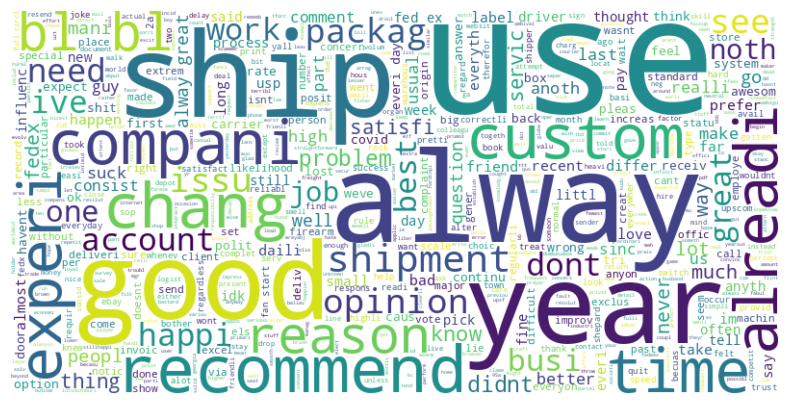

In [81]:


# Assuming X is a list of preprocessed text
class2_texts = ' '.join(class2)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words= 800).generate(class2_texts)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [39]:
# bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
# bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [ ]:
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization

# Perform label encoding on the class labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Vectorize the text using Tokenizer
X_train = [str(x) if x and isinstance(x, str) else "unknown" for x in X_train]
X_test = [str(x) if x and isinstance(x, str) else "unknown" for x in X_test]


In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint('bilstm.h5', save_best_only=True, save_weights_only=True, monitor='val_accuracy', mode='max', verbose=1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
keras.backend.clear_session()
model = Sequential()

# Add an Embedding layer
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length))
# Add a Bidirectional LSTM layer
model.add(Bidirectional(LSTM(64, return_sequences=True, activation='tanh')))

# Add BatchNormalization
model.add(BatchNormalization())

# Add GlobalMaxPooling1D
model.add(GlobalMaxPooling1D())

# Add a Dense layer with L2 regularization
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))

# Add Dropout
model.add(Dropout(0.2))

# Add the output Dense layer
model.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=15)
# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16, callbacks=[early_stop, checkpoint])


# Predict classes using the trained model
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

# Calculate the accuracy of predicted classes
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Convert the classes to string type for target names
target_names = [str(cls) for cls in label_encoder.classes_]

# Calculate the prediction accuracy for each class with zero_division parameter
report = classification_report(y_test, y_pred, target_names=target_names, zero_division=1)
print("Classification Report:")
print(report)


TypeError: ignored

In [ ]:

# Define the CNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length))
model.add(Conv1D(64, min(5, max_length), activation='relu'))
model.add(BatchNormalization())
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))  # Added L2 regularization
model.add(Dropout(0.6))
model.add(Dense(len(np.unique(y)), activation='softmax'))

# Compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)
# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=16, callbacks=[early_stop])


# Predict classes using the trained model
y_pred_probs = model.predict(X_test)
y_pred = y_pred_probs.argmax(axis=1)

# Calculate the accuracy of predicted classes
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Convert the classes to string type for target names
target_names = [str(cls) for cls in label_encoder.classes_]

# Calculate the prediction accuracy for each class with zero_division parameter
report = classification_report(y_test, y_pred, target_names=target_names, zero_division=1)
print("Classification Report:")
print(report)

Epoch 1/10
300/300 [==============================] - 6s 17ms/step - loss: 1.7597 - accuracy: 0.5323 - val_loss: 1.7885 - val_accuracy: 0.6550
Epoch 2/10
300/300 [==============================] - 6s 21ms/step - loss: 1.0624 - accuracy: 0.7206 - val_loss: 1.0594 - val_accuracy: 0.7143
Epoch 3/10
300/300 [==============================] - 5s 17ms/step - loss: 0.7169 - accuracy: 0.8184 - val_loss: 0.9356 - val_accuracy: 0.7201
Epoch 4/10
300/300 [==============================] - 9s 29ms/step - loss: 0.5197 - accuracy: 0.8719 - val_loss: 0.9653 - val_accuracy: 0.7377
Epoch 5/10
38/38 [==============================] - 0s 7ms/step
Accuracy: 0.7443609022556391
Classification Report:
                            precision    recall  f1-score   support

Layout/Navigation/Usablity       0.78      0.83      0.81       395
               Operational       0.76      0.78      0.77       430
                    Others       0.55      0.49      0.52       136
              Pricing/Cost       0.76  

# Deploying the model into your most recent target dataset

In [ ]:
#Load new dataset

from google.colab import files
uploded = files.upload()





In [ ]:
target_data = pd.read_csv('dashboard_derby_new.csv')
#data exploration
target_data.head()
target_data.shape
target_data.columns

In [ ]:
target_data['original_comment']=target_data['comment']
test_series = target_data[['Q4 - What can UPS do to better serve you?']]

In [ ]:
test_series= test_series.dropna()
test_series['preprocessed_text']= test_series['Q4 - What can UPS do to better serve you?'].apply(preprocessed_text )

,Q4 - What can UPS do to better serve you?,preprocessed_text
0,I found that I entered the wrong phone number ...,i found that i entered the wrong phone number ...
1,timeliness,timeliness
2,Can't think of anything,cant think of anything
3,It should have been clear that the charge on t...,it should have been clear that the charge on t...
4,Keep up the good work!,keep up the good work


In [ ]:
test_s = test_series['preprocessed_text']
X_test.shape, X_train.shape, test_s.shape
#preprocesing
test_s = tokenizer.texts_to_sequences(test_s)

# Pad sequences to have the same length
max_length = max([len(x) for x in X_train])
test_s = pad_sequences(test_s, maxlen=max_length)

((1197, 378), (4785, 378), (44363,))

In [ ]:
test_s.shape, X_train.shape
y_pred_test = model.predict(test_s)

1387/1387 [==============================] - 51s 37ms/step


In [ ]:
y_pred_deploy = y_pred_test.argmax(axis=1)

In [ ]:
test_series['predicted_class'] = y_pred_deploy

In [ ]:
y_pred_deploy_labeled = label_encoder.inverse_transform(y_pred_deploy)

In [ ]:
test_series['y_pred_labelled'] = y_pred_deploy_labeled

In [ ]:
test_series

,Q4 - What can UPS do to better serve you?,preprocessed_text,predicted_class,y_pred_labelled
0,I found that I entered the wrong phone number ...,i found that i entered the wrong phone number ...,4,Support/Sales
1,timeliness,timeliness,2,Others
2,Can't think of anything,cant think of anything,5,Technical/Performance
3,It should have been clear that the charge on t...,it should have been clear that the charge on t...,3,Pricing/Cost
4,Keep up the good work!,keep up the good work,1,Operational
...,...,...,...,...
44358,Nothing really. I had not used WorldShip in a ...,nothing really i had not used worldship in a w...,4,Support/Sales
44359,bl,bl,2,Others
44360,bl,bl,2,Others
44361,Make sure packages arrive on time. I understan...,make sure packages arrive on time i understand...,1,Operational


In [ ]:
test_series[['Q4 - What can UPS do to better serve you?', 'predicted_class', 'y_pred_labelled']].to_excel('Derby_Q3.xlsx')
